(prob-input:univariate-random-variable)=
# Creating a Univariate Random Variable

A probabilistic input to a UQ test function consists of input variables
each of which is a (univariate) random variable.
Therefore, the starting point of defining a (possibly multivariate)
probabilistic input is defining the distribution
for each of the constituent random variables.
This page explains how such a random variable can be created in UQTestFuns.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import uqtestfuns as uqtf

Suppose we would like to define a univariate random variable $X$
whose distribution is triangular:

$$
X \sim \mathcal{T}_r(a, b, c)
$$

where $a$, $b$, and $c$ are the parameters of the triangular distribution.
These parameters correspond to the lower bound, the upper bound,
and the mid-point of the distribution. 
For this particular example, we set these values to $3.0$, $5.0$, and $4.0$.

## A ``UnivDist`` instance

A univariate random variable is represented in UQTestFuns by the ``UnivDist`` class.
To create an instance of the class, you need to pass the following arguments:

- `distribution`: the chosen univariate distribution (one from this {ref}`list <prob-input:available-univariate-distributions>`)
- `parameters`: the parameters of the distribution (note that the number of required parameters differs from distribution to another)
- `name`: the name of the random variable (optional)
- `description`: a short text describing the random variable (optional) 

To create an instance, type:

In [2]:
my_rand_var = uqtf.UnivDist(
    distribution="triangular",
    parameters=[3.0, 5.0, 4.0],
    name="X",
    description="My random variable",
)
my_rand_var

UnivDist(distribution='triangular', parameters=array([3., 5., 4.]), name='X', description='My random variable')

The variable `my_rand_var` now stores an instance
of a univariate random variable distributed as triangular
with the specified parameters.

An instance of ``UnivDist`` exposes the following properties:

|    Property    |                                               Description                                                |
|:--------------:|:--------------------------------------------------------------------------------------------------------:|
|     `name`     |                         the assigned name of the random variable (may be `None`)                         |
| `description`  |                     the assigned description of the random variable (may be `None`)                      |
| `distribution` | the distribution (one of {ref}`available distributions <prob-input:available-univariate-distributions>`) |
|  `parameters`  |                                    the parameters of the distribution                                    |
|    `lower`     |                                   the lower bound of the distribution                                    |
|    `upper`     |                                   the upper bound of the distribution                                    |

and methods:

|            Method             |                                     Description                                      |
|:-----------------------------:|:------------------------------------------------------------------------------------:|
|           `cdf(xx)`           |       compute the cumulative distribution function on a set of values `xx`           |
|           `pdf(xx)`           |           compute the probability density function on a set of values `xx`           |
|          `icdf(xx)`           |     compute the inverse cumulative distribution function on a set of values `xx`     |
|   `get_sample(sample_size)`   |               get a sample of size `sample_size` from the distribution               |
| `transform_sample(xx, other)` | transform a set of sample values `xx` (of this distribution) to `other` distribution |

Let's go through each one of these methods.

## Computing the CDF values

The CDF values for a set of sample values in $\mathcal{D}_X$ can be computed using the `cdf()` method.
Suppose we want to evaluate the CDF of the distribution on its support:

In [3]:
xx = np.linspace(my_rand_var.lower, my_rand_var.upper, 1000)
yy_cdf = my_rand_var.cdf(xx)

The plot is shown below:

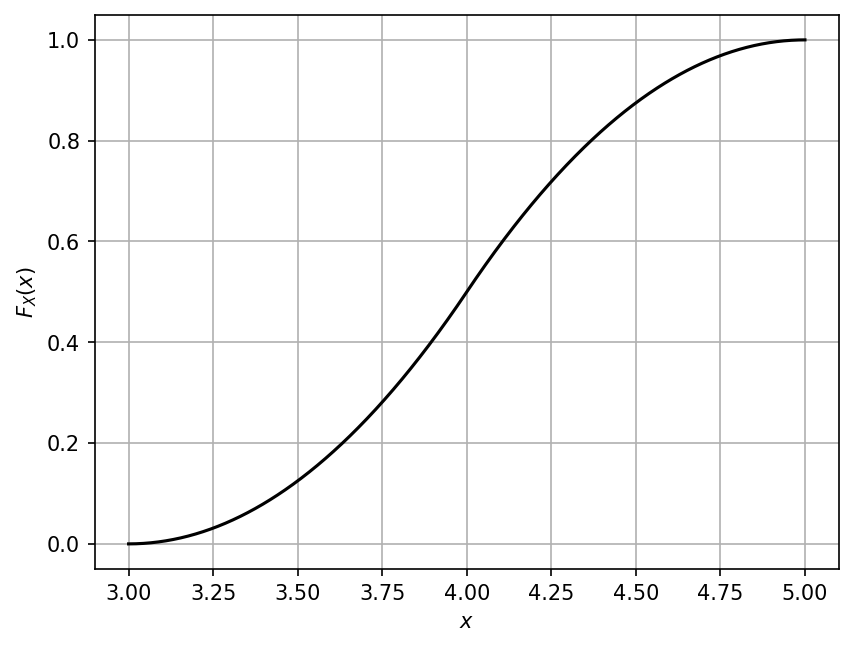

In [4]:
plt.plot(xx, yy_cdf, color="k")
plt.xlabel("$x$")
plt.ylabel("$F_X (x)$")
plt.grid()
plt.gcf().set_dpi(150)

## Computing the PDF values

The PDF values for a set of sample values in $\mathcal{D}_X$
can be computed using the `pdf()` method.
Similarly as before:

In [5]:
yy_pdf = my_rand_var.pdf(xx)

and with the plot shown below.

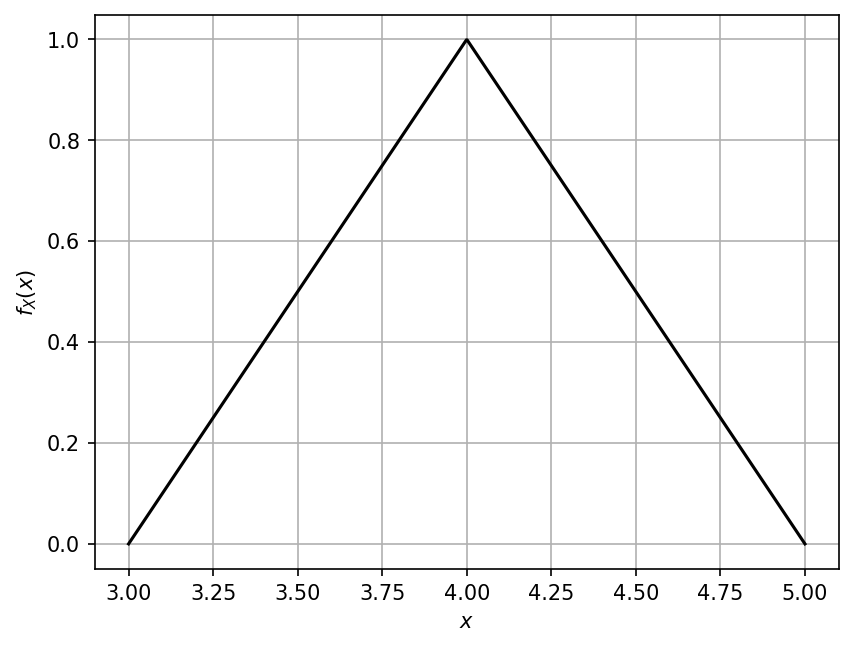

In [6]:
plt.plot(xx, yy_pdf, color="k")
plt.xlabel("$x$")
plt.ylabel("$f_X (x)$")
plt.grid()
plt.gcf().set_dpi(150)

## Computing the ICDF values

The ICDF values can be obtained using the `icdf()` method.
Unlike the CDF and PDF, the input to ICDF is a probability value $p$ in $[0, 1]$.
For a given $p$, the function returns the quantile value,
i.e., the value $x$ such that $F_X (x) = \mathbb{P}[X \leq x] = p$ 

Suppose we want to compute the ICDF on a set of equidistant points in $[0, 1]$:

In [7]:
xx_icdf = np.linspace(0, 1, 1000)
yy_icdf = my_rand_var.icdf(xx_icdf)

The plot of the ICDF is shown below.

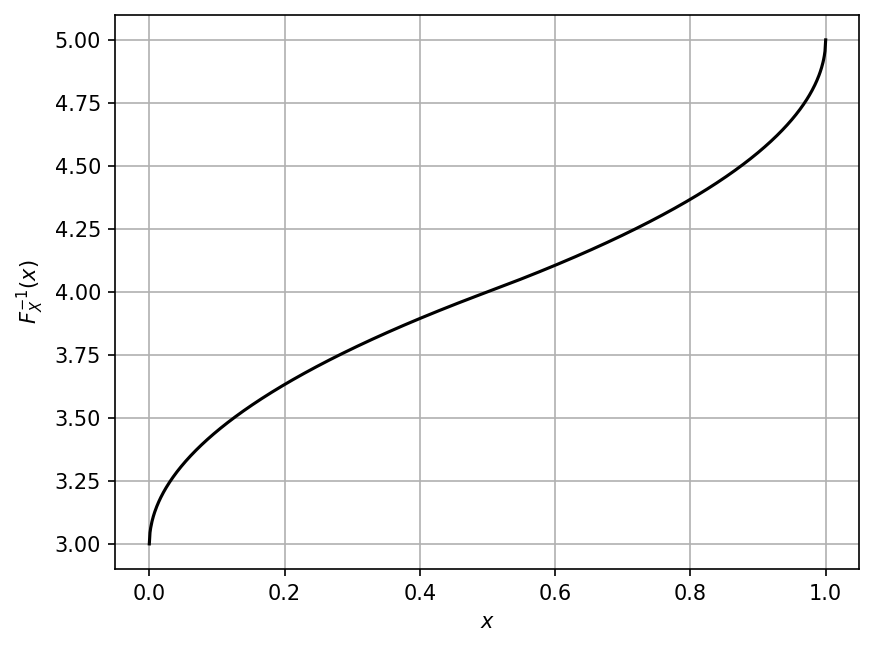

In [8]:
plt.plot(xx_icdf, yy_icdf, color="k")
plt.xlabel("$x$")
plt.ylabel("$F^{-1}_X (x)$")
plt.grid()
plt.gcf().set_dpi(150)

## Getting a sample

Strictly speaking, sampling a random variable $X$ means generating a value $x$
in $\mathcal{D}_X$ such that the probability of getting $x$
is following the distribution $F_X(x)$.
The `get_sample()` method allows us to generate a sample
of a given size from the random variable.

For instance, in the code below, we generate $10'000$ sample points:

In [9]:
xx_sample = my_rand_var.get_sample(10000)

To see whether this sample is distributed according
to the specified triangular distribution, we can make a histogram of it:

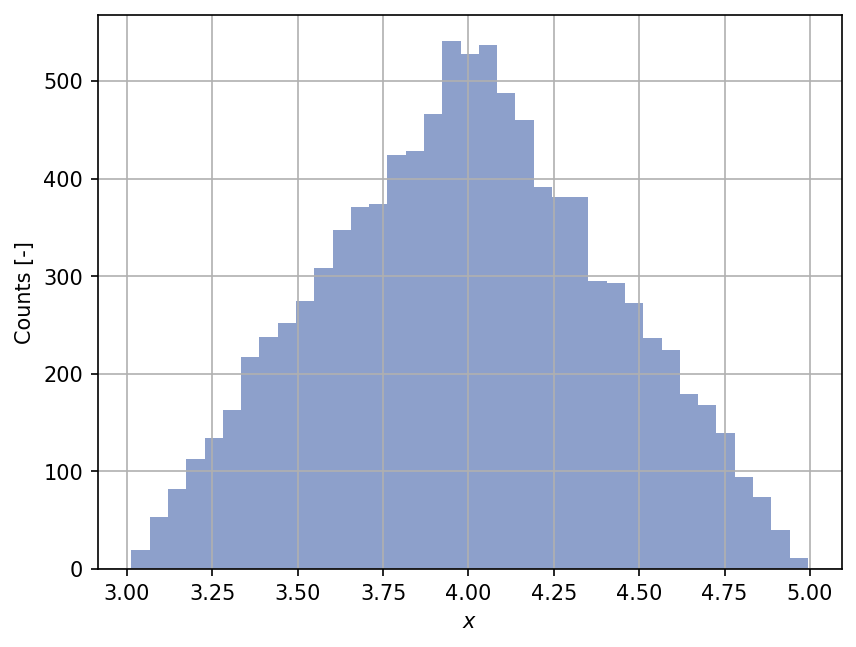

In [10]:
plt.hist(xx_sample, bins="auto", color="#8da0cb");
plt.grid()
plt.xlabel("$x$")
plt.ylabel("Counts [-]")
plt.gcf().set_dpi(150)

## Transforming a sample

The `transform_sample()` method facilitates the transformation
between a sample generated from one distribution to another.

Let's suppose, complementary to the random variable $X$ we define
another random variable as follows:

In [11]:
my_rand_var_2 = uqtf.UnivDist(distribution="normal", parameters=[0, 1], name="Y")

In other words, the variable $Y$ is a standard normal random variable.
The sample from $X$ can be transformed to $Y$ as follows:

In [12]:
xx_sample_2 = my_rand_var.transform_sample(xx_sample, my_rand_var_2)

The histogram of the transformed sample is shown below.

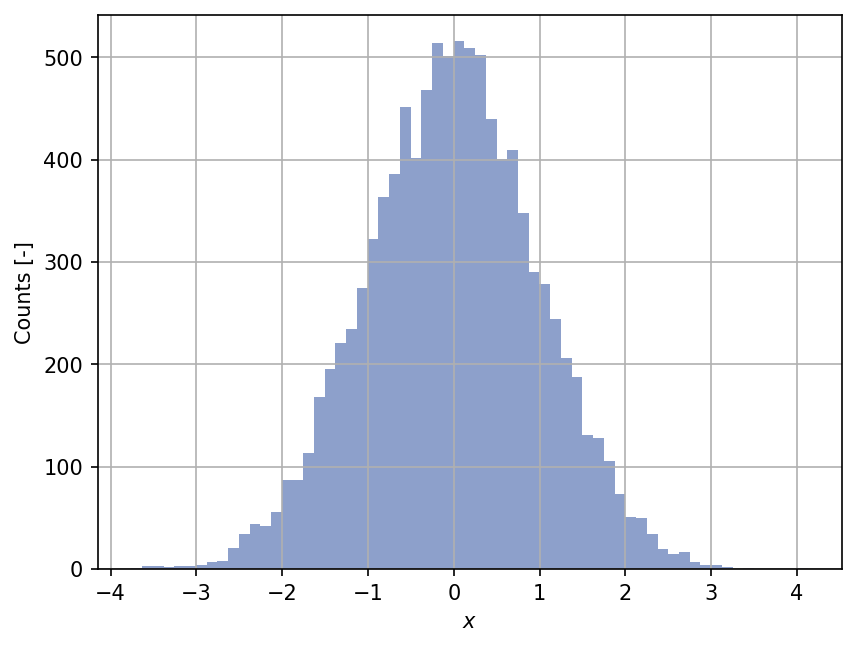

In [13]:
plt.hist(xx_sample_2, bins="auto", color="#8da0cb");
plt.grid()
plt.xlabel("$x$")
plt.ylabel("Counts [-]")
plt.gcf().set_dpi(150)

```{note}
The transformation of sample from the standard uniform random variable to another
(say, target) random variable is the basis of the so-called
_inverse transform sampling_.
This is because the transformation function is the ICDF 
of the target distribution.
```

## Notes on the support of a distribution

The support of a univariate continuous random variable consists of two components,
the lower and upper bounds.
In the case of the above triangular distribution,
its support is $\mathcal{D}_X = [3.0, 5.0]$ (the lower and upper bounds are $3.0$ and $5.0$, respectively).
Such a distribution is _supported on a bounded interval_;
specifically, the distribution is bounded from the right (below) and left (above).

Consider, on the other hand, the standard normal distribution.
Its support is, strictly speaking, $\mathcal{D}_X = (-\infty, \infty)$.
This is an example of distributions that are supported on the whole real line;
it is neither bounded from below nor from above.

The properties of a ``UnivDist`` instance include among other things,
`lower` (lower bound) and `upper` (upper bound).
For the triangular distribution defined above, the lower and upper bounds are indeed:

In [14]:
my_rand_var.lower, my_rand_var.upper

(3.0, 5.0)

However, for the standard normal distribution, they are:

In [15]:
my_rand_var_2.lower, my_rand_var_2.upper

(-8.222082216130435, 8.209536151601387)

which means that this distribution in UQTestFuns is actually bounded.

This "truncation" is based on practical consideration.
Numerically, at least, infinity does not mean much.
The distribution must be numerically truncated somehow.
In the case of standard normal distribution, the value of $-8.22$ and $8.21$ correspond
to the quantile values whose probabilities are $10^{-16}$ and $1-10^{-16}$, respectively.

This means that by truncating the unbounded standard normal distribution
from both sides at these values,
we are consciously ignoring the values whose probabilities are at most $10^{-16}$.
This is an acceptable assumption in typical engineering applications.

[^random-variable]: A random variable is neither random
(it's uncertain, yes, but that does not necessarily mean the colloquial "random" or "completely unpredictable")
nor a variable (it's a function).